In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras import layers, models
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten , Conv2D,MaxPooling2D , Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Loading the dataset

In [ ]:
base = "/content/drive/MyDrive/Character_Recognition/0-9_image/"

data = os.listdir(base)
data_X = []
data_y = []
data_classes = len(data)
for i in range (1, data_classes+1):
    data_list = os.listdir( base + "Sample" + str(i).zfill(3))
    for j in data_list:
        pic = cv2.imread( base  + "Sample" + str(i).zfill(3) +"/"+j)
        pic = cv2.resize(pic, (32, 32))
        data_X.append(pic)
        data_y.append(i-1)

if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Dataponits =  10161


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (509, 32, 32, 3)


#### Preprocessing

In [ ]:
def Prep(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #making image grayscale
    img = cv2.equalizeHist(img) #Histogram equalization to enhance contrast
    img = img/255 #normalizing
    return img

In [ ]:
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))
#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)
#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

#### One hot encoding

In [ ]:
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

#### Building the model

In [2]:
def create_model():
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [3]:
def myModel():
    model = Sequential()
    model.add((Conv2D(60,(5,5),input_shape=(32,
                      32,1),activation='relu')))
    model.add((Conv2D(60, (5,5), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add((Conv2D(30, (3, 3), activation='relu')))
    model.add((Conv2D(30, (3, 3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = myModel()

In [ ]:
history = model.fit(datagen.flow(train_X , train_y,
                                 batch_size=50),
                                 epochs=40,
                                 validation_data=(valid_X,valid_y),
                                 shuffle=1)

Epoch 1/40
155/155 [==============================] - 59s 373ms/step - loss: 1.1844 - accuracy: 0.5831 - val_loss: 0.1056 - val_accuracy: 0.9694
Epoch 2/40
155/155 [==============================] - 57s 368ms/step - loss: 0.3572 - accuracy: 0.8850 - val_loss: 0.0890 - val_accuracy: 0.9731
Epoch 3/40
155/155 [==============================] - 53s 342ms/step - loss: 0.2372 - accuracy: 0.9224 - val_loss: 0.0385 - val_accuracy: 0.9876
Epoch 4/40
155/155 [==============================] - 57s 369ms/step - loss: 0.1888 - accuracy: 0.9386 - val_loss: 0.0275 - val_accuracy: 0.9917
Epoch 5/40
155/155 [==============================] - 59s 382ms/step - loss: 0.1502 - accuracy: 0.9514 - val_loss: 0.0373 - val_accuracy: 0.9907
Epoch 6/40
155/155 [==============================] - 60s 385ms/step - loss: 0.1411 - accuracy: 0.9562 - val_loss: 0.0247 - val_accuracy: 0.9912
Epoch 7/40
155/155 [==============================] - 60s 385ms/step - loss: 0.1340 - accuracy: 0.9574 - val_loss: 0.0167 - val_ac

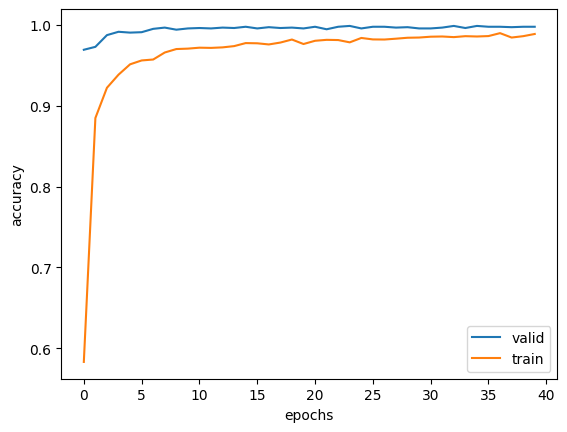

In [ ]:
plt.plot(history.history['val_accuracy'], label='valid')
plt.plot(history.history['accuracy'], label='train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

16/16 [==============================] - 1s 56ms/step - loss: 0.0160 - accuracy: 0.9941
Test Loss: 0.015987135469913483
Test Accuracy: 0.994106113910675


In [ ]:
model.save('/content/drive/MyDrive/Character_Recognition/model4.h5')
# print('model saved')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = models.load_model('model.h5')